# Cell-cell interaction analysis (Breast Cancer, GAPDH_ACTB, within-spot)

### 1. Data loading and preprocessing

In [1]:
import stlearn as st
import pandas as pd
import random
# read in visium dataset downloaded from: support.10xgenomics.com/spatial-gene-expression/datasets/1.0.0/V1_Breast_Cancer_Block_A_Section_2
data = st.Read10X("C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Human_Breast_Cancer_Block_A_Section_1")
st.add.image(adata=data, imgpath="C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Human_Breast_Cancer_Block_A_Section_1\\spatial\\tissue_hires_nobg.png",
            library_id="V1_Breast_Cancer_Block_A_Section_1",visium=True)

st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.scale(data)
data.obsm['scaled'] = pd.DataFrame(data.X, data.obs_names, data.var_names)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Added tissue image to the object!
Normalization step is finished in adata.X
Scale step is finished in adata.X


### 2. Cell type diversity

label transfer results added to adata.uns['label_transfer']
predicted label added to adata.obs['predictions'].


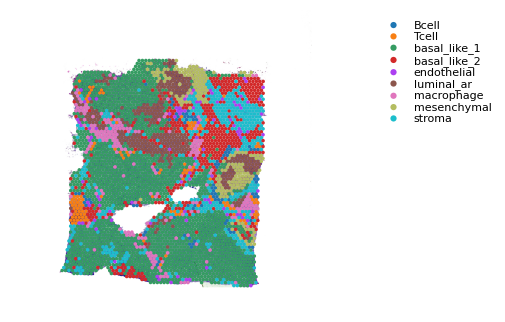

In [2]:
# Read in the cell type predictions for each spot based on label transfer
st.add.labels(data, 'label_transfer_bc.csv')
st.pl.cluster_plot(data,use_label="predictions", dpi=100, name='label_transfer', output='.')

Counts for cluster (cell type) diversity stored into adata.uns['cci_het']


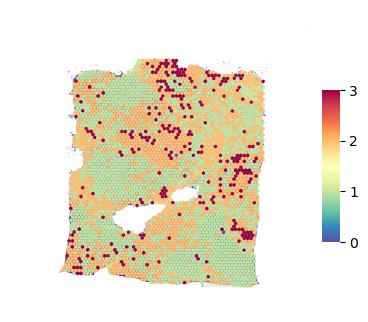

In [3]:
st.tl.cci.het.count(data, use_clustering='label_transfer', distance=0)
st.pl.het_plot(data, use_het='cci_het', dpi=100, name='het_louvain', output='.')

### 3. Ligand-receptor co-expression

#### Read in user input LR pair

In [4]:
data.uns["lr"] = ['GAPDH_ACTB']

#### Calculate the proportion of known ligand-receptor co-expression in the neighbouring spots

Altogether 2 valid L-R pairs
L-R interactions with neighbours are counted and stored into adata\.uns['cci_lr']


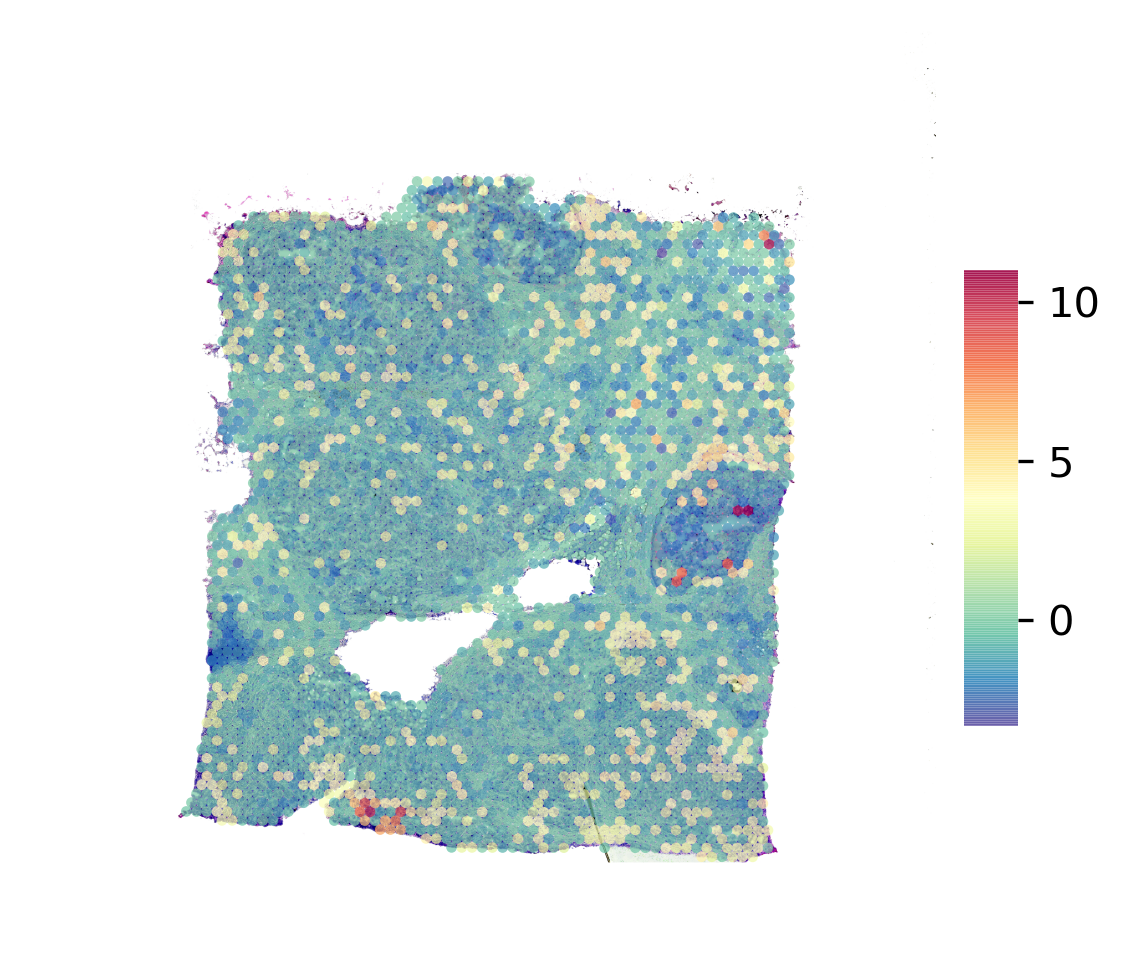

In [5]:
st.tl.cci.base.lr(adata=data, use_data='scaled', distance=0)
st.pl.het_plot(data, use_het='cci_lr', dpi=300, data_alpha=0.7, name='cci_lr', output='.')

### 4. Merge CCI cell type diversity and L-R co-expression scores

Results of spatial interaction analysis has been written to adata.uns['merged']


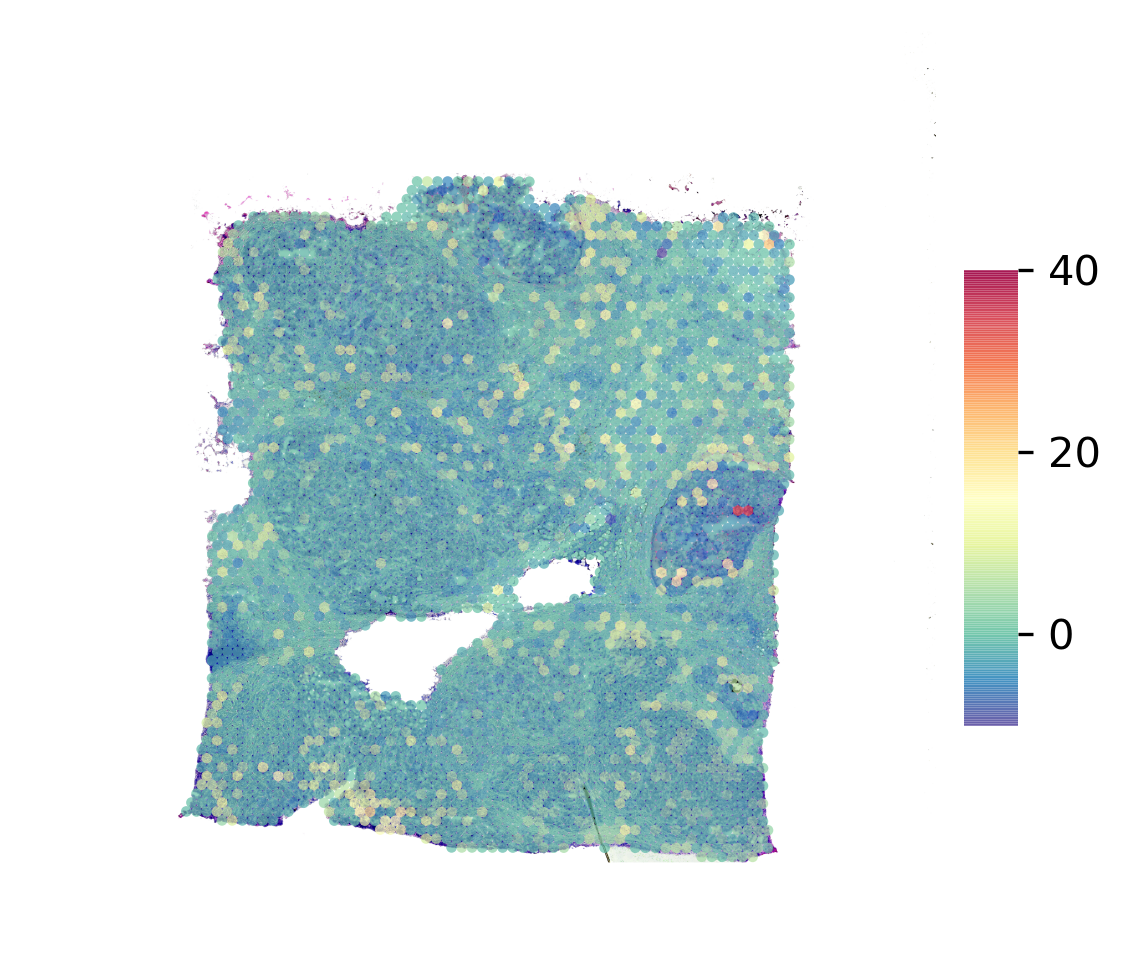

In [6]:
st.tl.cci.merge(data, use_lr='cci_lr', use_het='cci_het')
st.pl.het_plot(data, use_het='merged', dpi=300, data_alpha=0.7, vmax=40, name='merged', output='.')

### Caution! The next step could take several hours depending on the permutation parameters.

In [7]:
st.tl.cci.permutation(data, n_pairs=200, use_data='scaled', distance=0)

C:\Users\uqjxu8\AppData\Local\Continuum\anaconda3\envs\stlearn\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


AnnData object with n_obs × n_vars = 3813 × 20687
    obs: 'in_tissue', 'array_row', 'array_col', 'sum_counts', 'imagecol', 'imagerow', 'predictions'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mean', 'std'
    uns: 'spatial', 'label_transfer', 'tmp_color', 'cci_het', 'lr', 'cci_lr', 'merged', 'background', 'merged_pvalues', 'merged_sign'
    obsm: 'spatial', 'filtered_counts', 'normalized_total', 'scaled'

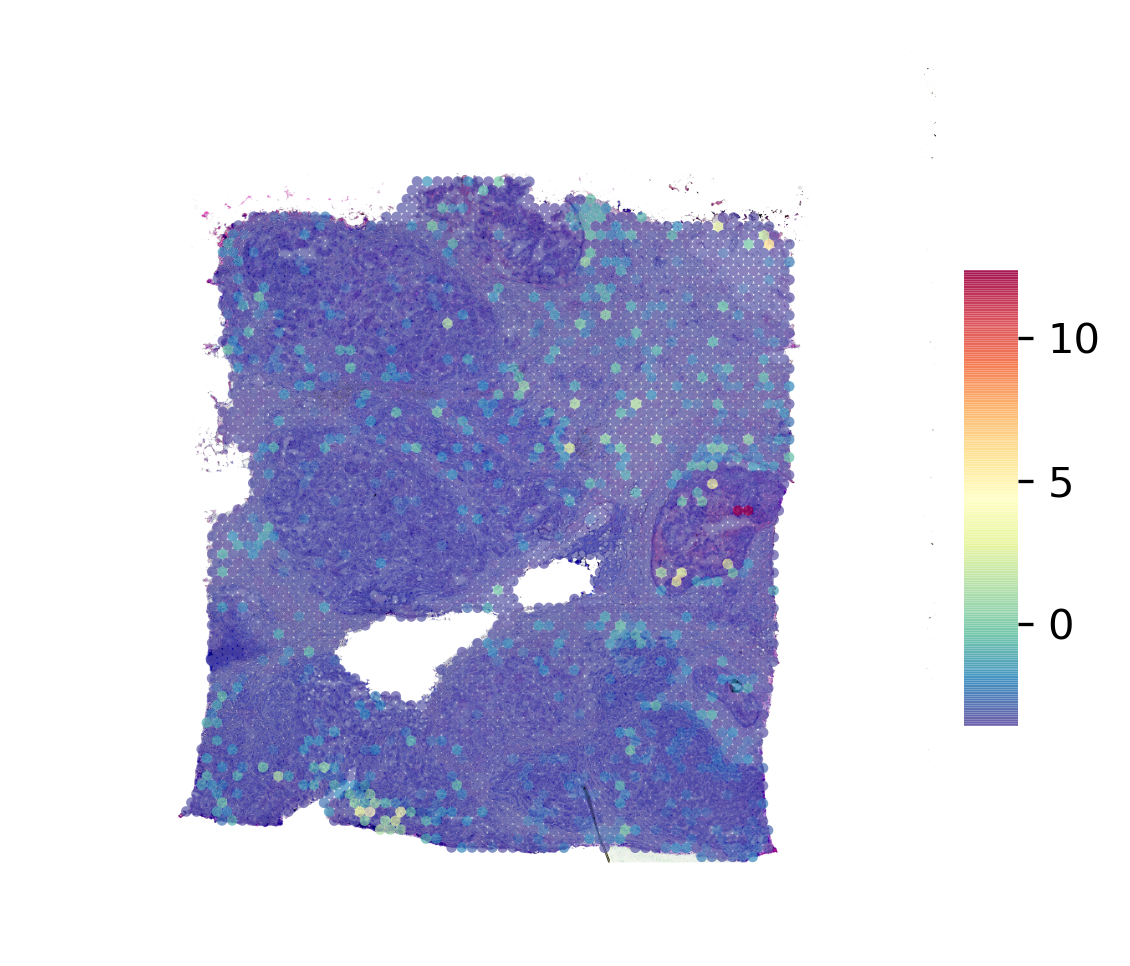

In [8]:
# plot the -log10(pvalue) from permutation test on each spot
st.pl.het_plot(data, use_het='merged_pvalues', dpi=300, data_alpha=0.7, name='permutation', output='.')

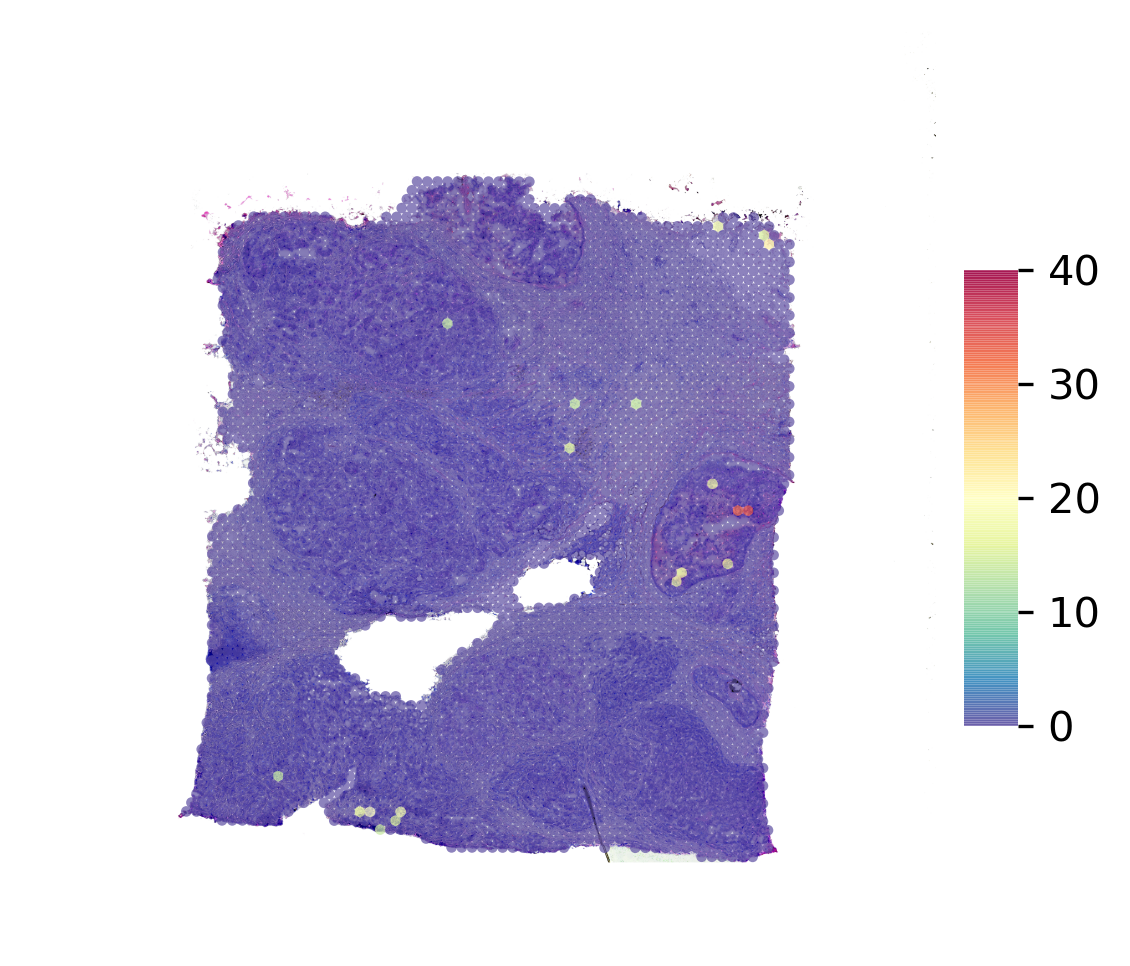

In [9]:
st.pl.het_plot(data, use_het='merged_sign', dpi=300, data_alpha=0.7, vmax=40, name='final', output='.')

In [10]:
(data.uns['merged']>0).sum()

672

In [11]:
(data.uns['merged_sign']>0).sum()

19

In [12]:
import numpy as np
((data.uns['merged_pvalues']+np.log10(3813))>1.3).sum()

310